# Import Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
# sns.color_palette('Set2')

# Data Dictionary

# Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hitikam/main/main/spotify_tracks.csv')
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [ ]:
# Compute summary of statistics including object columns
df.describe(include ='all')

,id,name,genre,artists,album,popularity,duration_ms,explicit
count,6300,6300,6300,6300,6300,6300.000000,6.300000e+03,6300
unique,6187,4518,126,4651,4949,NaN,NaN,2
top,1OG1NoKpZZLrMqMYCk9m84,Kids,acoustic,Metallica,Bach & Friends,NaN,NaN,False
freq,3,26,50,22,20,NaN,NaN,5106
mean,NaN,NaN,NaN,NaN,NaN,30.754762,2.028477e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,19.948991,1.210299e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,3.006000e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,16.000000,1.476870e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,1.916070e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,45.000000,2.369625e+05,NaN


In [ ]:
# Check for null values
df.isnull().sum()

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [ ]:
# Check for duplicate rows across all columns
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Check for frequency counts
for column in df.columns:
    print(df[column].value_counts())
    print("\n")

id
1OG1NoKpZZLrMqMYCk9m84    3
4uOBL4DDWWVx4RhYKlPbPC    3
2cqxvn34ihH7BSv9XbkOgq    3
190l7oYBQe6JBsWPJM2uNN    2
28zSrc22pN7CSv01aKVxvg    2
                         ..
7qpbYhyFEv6e6dDhPyDKYZ    1
63FWYiuggXZPsiNae0L9cd    1
5ct1TZKCnSxyDzUxhgLcAq    1
0fW7wX2goqLrMCjkxP7873    1
3ry0f8ybk8upUBIk8unvmF    1
Name: count, Length: 6187, dtype: int64


name
Kids                           26
Movies                         26
Chill                          23
Romance                        23
Road Trip                      23
                               ..
The Grave Awaits                1
Punishment                      1
We Hate Grindcore               1
The Protocols Of Anti-Sound     1
Fiore d'inverno                 1
Name: count, Length: 4518, dtype: int64


genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
                     ..
french               50
forro                50
folk                 50
emo 

In [ ]:
# Drop irrelevant columns
df.drop(columns=["id"],inplace=True, errors = 'ignore')

In [ ]:
# Check for categorical variables
df_categorical = df.select_dtypes(include=['object']).columns
df_categorical

Index(['name', 'genre', 'artists', 'album'], dtype='object')

In [ ]:
# Convert categorical variables to integers
from sklearn.preprocessing import LabelEncoder
for column in ['name','genre', 'artists', 'album', 'explicit']:
    l1 = LabelEncoder()
    df[column] = l1.fit_transform(df[column])

df

,name,genre,artists,album,popularity,duration_ms,explicit
0,71,0,497,39,58,172199,0
1,71,0,497,91,57,172202,0
2,1708,0,2700,1873,42,144786,0
3,72,0,3883,1128,46,116573,0
4,2536,0,1640,2765,33,133922,0
...,...,...,...,...,...,...,...
6295,4145,125,1498,3322,25,180001,0
6296,2181,125,3169,1639,25,276776,0
6297,3892,125,1997,4678,12,69533,0
6298,3962,125,1498,452,26,90001,0


In [ ]:
# Compute measures of central tendency
for column in df.columns:
    print(column)
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Mode: {df[column].mode()}")
    print("\n")

name
Mean: 2230.5236507936506
Median: 2198.5
Mode: 0    2148
1    2506
Name: name, dtype: int64


genre
Mean: 62.5
Median: 62.5
Mode: 0        0
1        1
2        2
3        3
4        4
      ... 
121    121
122    122
123    123
124    124
125    125
Name: genre, Length: 126, dtype: int64


artists
Mean: 2327.4079365079365
Median: 2317.5
Mode: 0    2619
Name: artists, dtype: int64


album
Mean: 2449.1550793650795
Median: 2450.5
Mode: 0    384
Name: album, dtype: int64


popularity
Mean: 30.754761904761907
Median: 29.0
Mode: 0    0
Name: popularity, dtype: int64


duration_ms
Mean: 202847.73523809525
Median: 191607.0
Mode: 0    120000
Name: duration_ms, dtype: int64


explicit
Mean: 0.1895238095238095
Median: 0.0
Mode: 0    0
Name: explicit, dtype: int64




<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


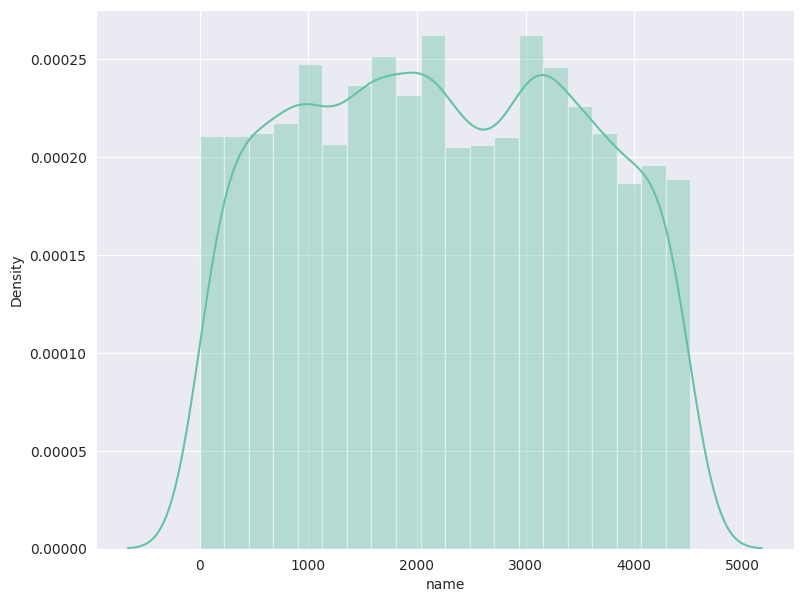

<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


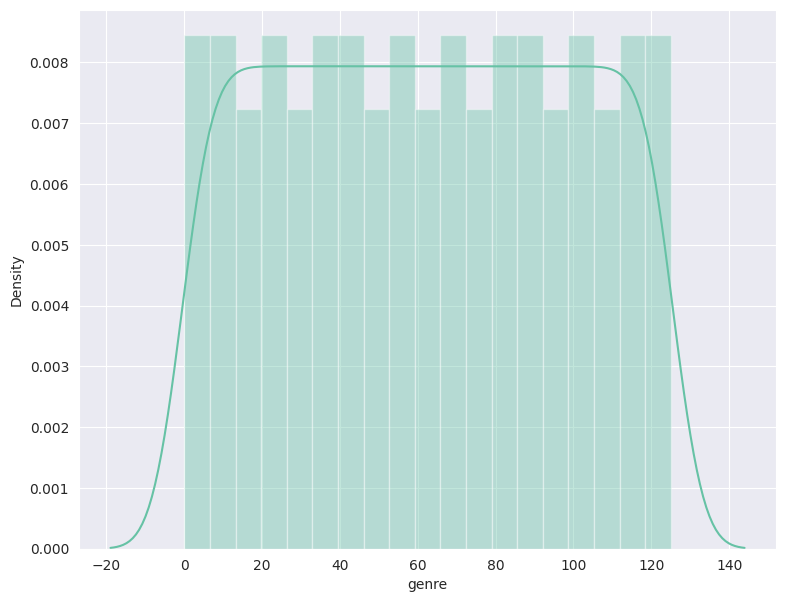

<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


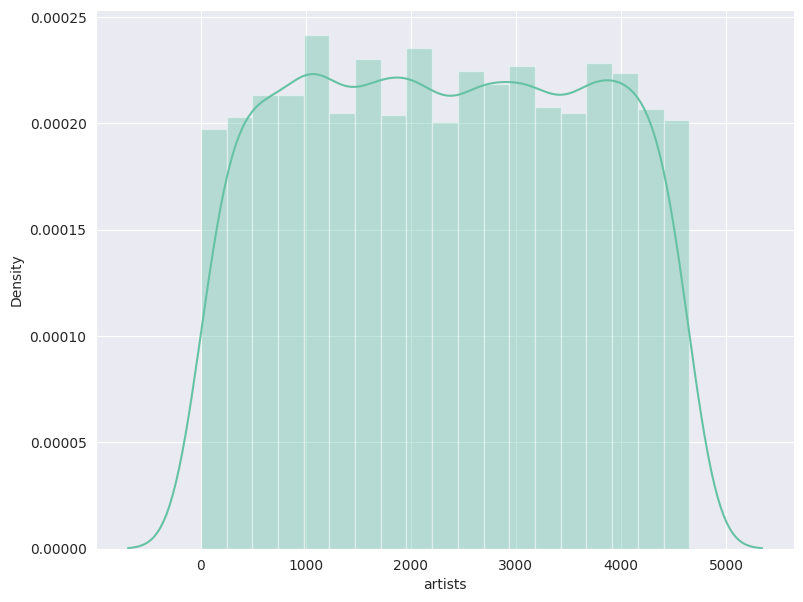

<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


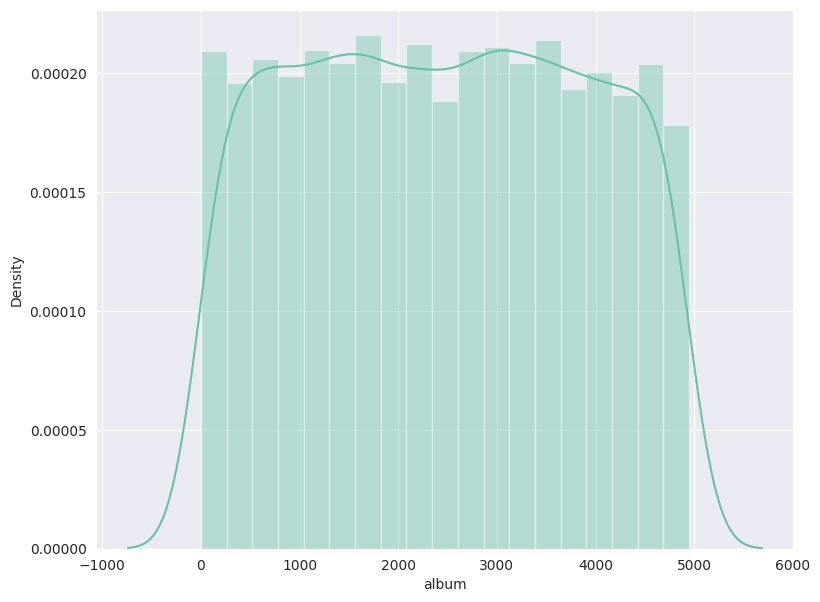

<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


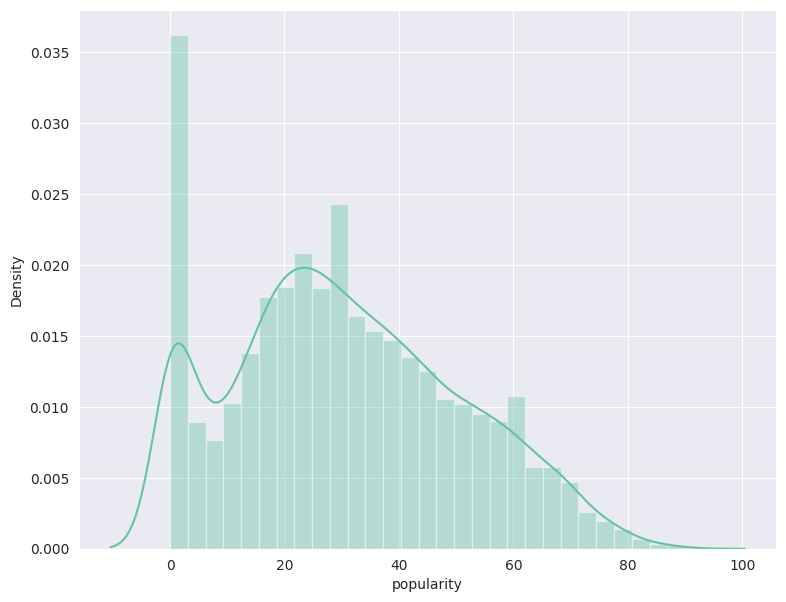

<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


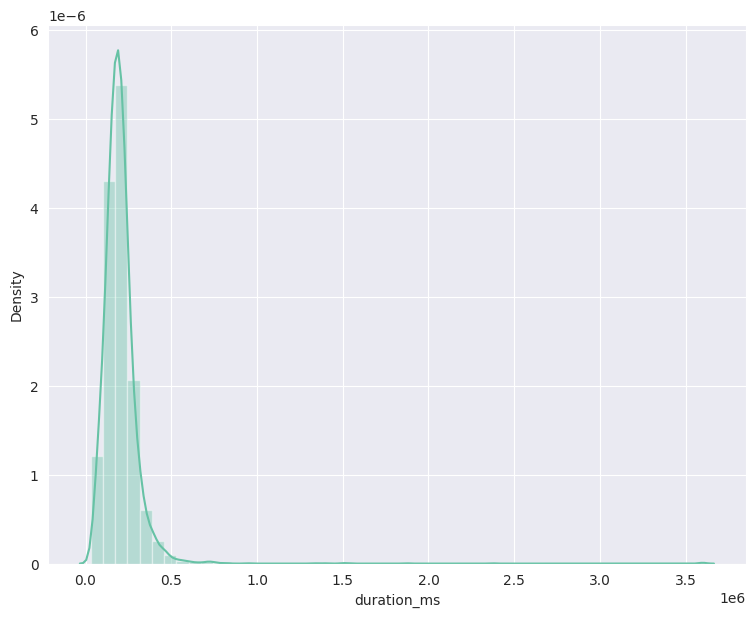

<ipython-input-12-91f1e349da48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


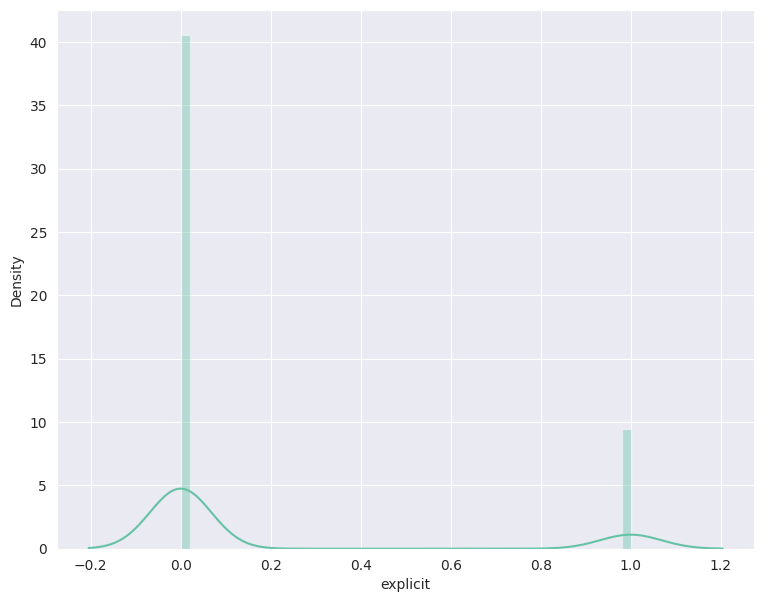

In [ ]:
# Plot distributions
numberical_features =  df.select_dtypes(exclude=[object])
for i in numberical_features.columns:
    plt.figure(figsize=(9, 7))
    sns.distplot(numberical_features[i])
    plt.show()

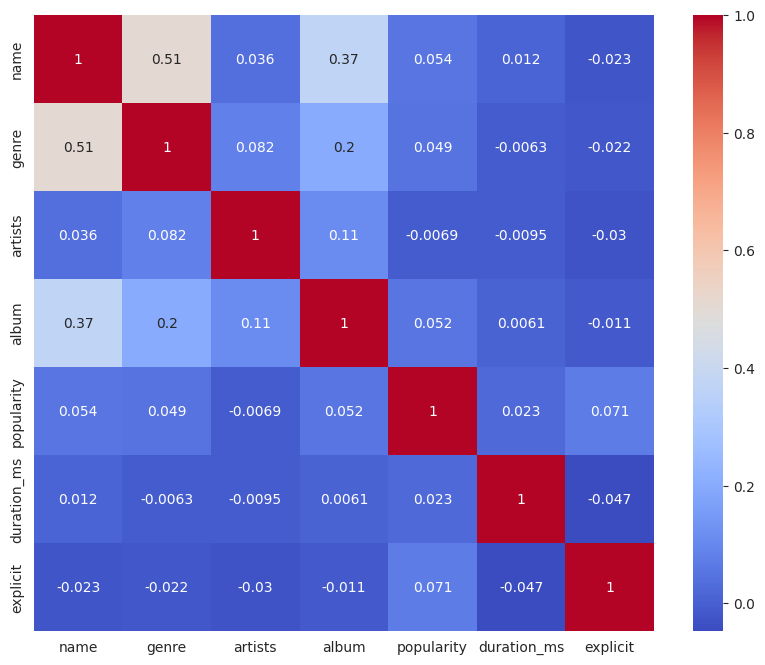

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
plt.show()

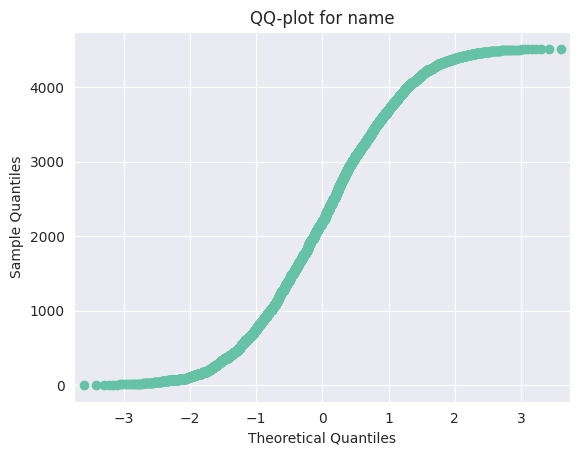

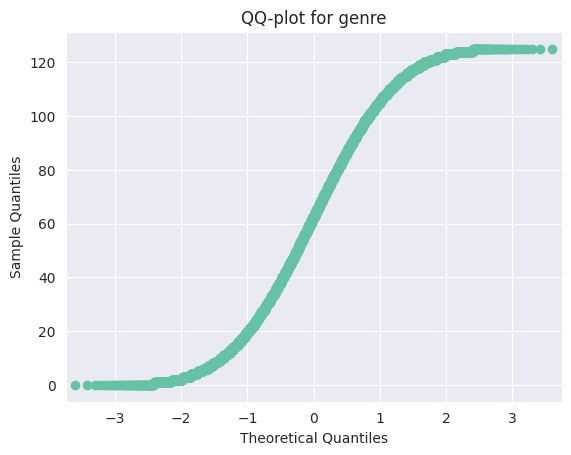

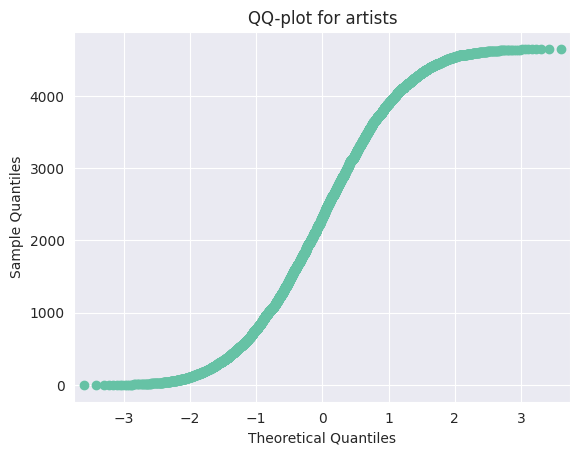

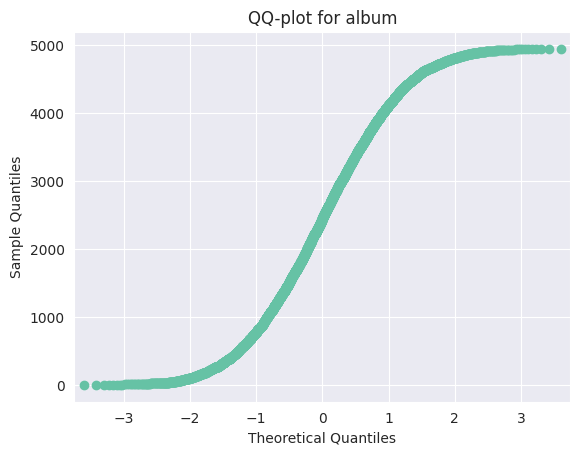

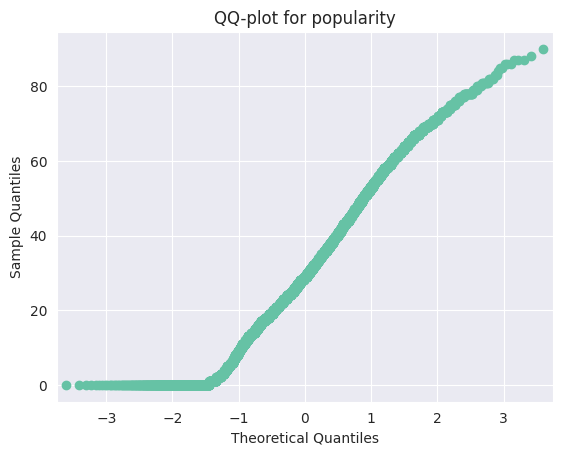

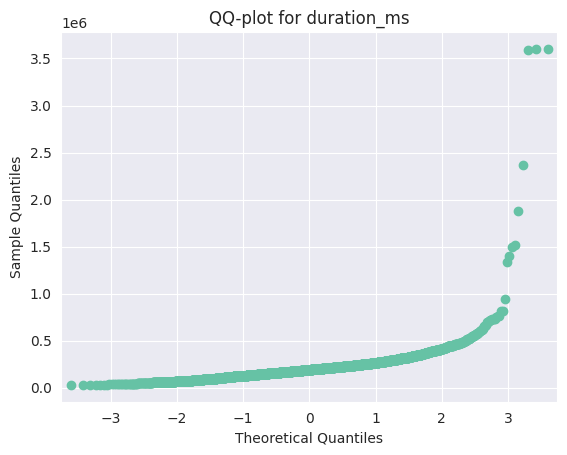

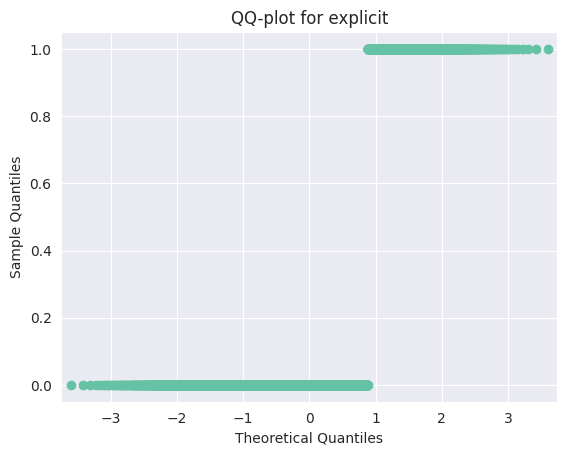

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

for i in df.columns:
    sm.qqplot(df[i], dist=stats.norm)
    plt.title("QQ-plot for {}".format(i))
    plt.show()

# Data Preprocessing

In [ ]:
from re import X
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set popularity column as target
X = df.drop('popularity', axis =1)
y = df.loc[:,'popularity'] # all rows and popularity column

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (6300, 6), Output: (6300,)
Train Set Size | Input: (5040, 6), Output: (5040,)
Test Set Size | Input: (1260, 6), Output: (1260,)


In [ ]:
train_set = np.concatenate((X_train, y_train.to_numpy().reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['name', 'genre', 'artists', 'album', 'popularity', 'duration_ms', 'explicit'])

df_train['popularity'] = df_train['popularity'].astype(int)

test_set = np.concatenate((X_test, y_test.to_numpy().reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['name', 'genre', 'artists', 'album', 'popularity', 'duration_ms', 'explicit'])

df_test['popularity'] = df_test['popularity'].astype(int)

df_train.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,-1.391729,-1.388434,0.430844,0.359002,0,2.067941,23.0
1,-1.342828,0.426153,-1.181646,-1.209376,0,-0.483573,19.0
2,-0.534382,-0.453647,0.992921,-0.506675,0,2.067941,13.0
3,-0.598269,-0.591115,0.782989,-1.342015,0,2.067941,17.0
4,0.911356,0.068734,0.424072,0.770322,0,-0.483573,30.0


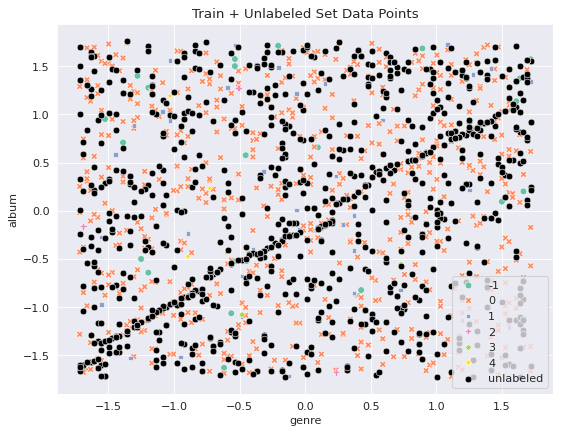

In [ ]:
plt.figure(figsize=(8,6), dpi=80)

df_train_sample = df_train.head(1000)
df_test_sample = df_test.head(1000)

sns.scatterplot(data=df_train_sample, x='genre', y='album', hue='popularity', style='popularity', palette="Set2")
sns.scatterplot(data=df_test_sample, x='genre', y='album', color='black', label='unlabeled')

plt.title('Train + Unlabeled Set Data Points')
plt.show()

# Modeling

## Affinity Propagation

In [ ]:



# application of clustering algorithm
ap_cluster = AffinityPropagation(preference = -50, max_iter=250, random_state=5)
results = ap_cluster.fit(df)

# interpretation of results
ap_cci = ap_cluster.cluster_centers_indices_
labels = ap_cluster.labels_
n_clusters_ = len(ap_cci)

print("Estimated number of clusters: %d" % n_clusters_)

# best value 1, worst value -1
# values close to 0 indicate overlapping values
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels, metric="sqeuclidean"))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 6163
Silhouette Coefficient: 0.038


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.manifold import TSNE

In [ ]:
#apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, verbose = 1)
tsne_embedding = tsne.fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6300 samples in 0.025s...
[t-SNE] Computed neighbors for 6300 samples in 0.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6300
[t-SNE] Computed conditional probabilities for sample 2000 / 6300
[t-SNE] Computed conditional probabilities for sample 3000 / 6300
[t-SNE] Computed conditional probabilities for sample 4000 / 6300
[t-SNE] Computed conditional probabilities for sample 5000 / 6300
[t-SNE] Computed conditional probabilities for sample 6000 / 6300
[t-SNE] Computed conditional probabilities for sample 6300 / 6300
[t-SNE] Mean sigma: 1392.339399
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.704731
[t-SNE] KL divergence after 1000 iterations: 0.666212


In [ ]:
# application of clustering algorithm
ap_cluster = AffinityPropagation(preference = -50, max_iter=250, random_state=5)
results = ap_cluster.fit_predict(tsne.embedding)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [ ]:
df_album = df['album']

In [ ]:
df_album['cluster_affinity'] = results

In [ ]:
silhouette_avg = metrics.silhouette_score(df, df_album['cluster_affinity'], metric="sqeuclidean")
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.35143603098327136


In [ ]:
fig = plt.scatter(
    df_album, x=tsne.embedding[:, 0], y=tsne.embedding[:, 1], color='cluster_affinity', hover_data=['artists']
)
fig.show()

TypeError: scatter() got multiple values for argument 'x'

In [ ]:
print("Cluster centers detected at:\n\n", X[ap_cci])

Cluster centers detected at:

 [[-1.68592461e+00 -1.69086476e+00  4.63951946e-01 -1.60094161e+00
   1.79272991e+01  2.06794147e+00]
 [-1.42091203e+00 -1.44342113e+00  1.04032523e+00  8.40168747e-01
   1.82305417e-02 -4.83572681e-01]
 [ 1.50211369e+00 -1.41592740e+00 -1.06426494e+00  1.45256290e+00
  -2.04285934e-01 -4.83572681e-01]
 [-1.40671492e+00 -1.41592740e+00 -1.06953206e+00 -1.29756662e+00
  -5.18737434e-01 -4.83572681e-01]
 [-1.31443375e+00 -1.33344619e+00  1.38143029e-01 -1.21149279e+00
   1.29913185e+00 -4.83572681e-01]
 [ 3.45049817e-01 -1.30595245e+00 -1.17788421e+00  8.50751595e-01
  -2.21015507e-02 -4.83572681e-01]
 [-1.28446209e+00 -1.27845872e+00 -8.27244594e-01  1.06805275e+00
  -1.24704212e-01 -4.83572681e-01]
 [-1.28446209e+00 -1.27845872e+00  4.92544876e-01 -1.20090994e+00
  -4.01666120e-01 -4.83572681e-01]
 [-1.24975806e+00 -1.25096498e+00  5.54997856e-01 -1.85662020e-01
  -3.87106574e-01 -4.83572681e-01]
 [-1.25449043e+00 -1.25096498e+00  9.90663821e-01  9.5658007

In [ ]:
X.shape

(6300, 6)

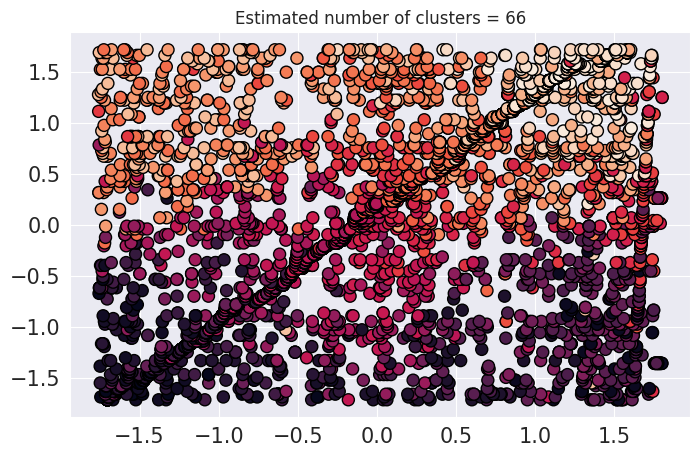

In [ ]:
# clustering visualization

plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1],edgecolors='k',c=ap_cluster.labels_,s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.show()

### Prediction

In [ ]:
# Make a sample song to test the model

music_sample = pd.DataFrame({
    'genre': [1.19],
    'artists': [4.5],
    'album': [-2.25],
    'popularity': [-11.82],
    'duration_ms': [0.04],
    'explicit': [0.14]
})

music_sample

,genre,artists,album,popularity,duration_ms,explicit
0,1.19,4.5,-2.25,-11.82,0.04,0.14


In [ ]:
# Predict the cluster for the new music
cluster_label = ap_cluster.predict(music_sample)[0]

print(f"The new music belongs to cluster {cluster_label}")

The new music belongs to cluster 62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AffinityPropagation was fitted without feature names
  warnings.warn(


## Content-Based Filtering

In [ ]:
! pip install textblob

In [ ]:
# Import library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/data102"

Mounted at /content/drive


In [ ]:
content_df = pd.read_csv('https://raw.githubusercontent.com/hitikam/main/main/spotify_tracks.csv')

In [ ]:
# Drop song duplicates
def drop_duplicates(content_df):
    '''
    Drop duplicate songs
    '''
    content_df['artists_song'] = content_df.apply(lambda row: row['name']+row['artists']+row['album'],axis = 1)
    return content_df.drop_duplicates('artists_song')

songDF = drop_duplicates(content_df)
print("Are all songs unique: ",len(pd.unique(songDF.artists))==len(songDF))

Are all songs unique:  False


In [ ]:
# Select useful columns
def select_cols(content_df):
       '''
       Select useful columns
       '''
       return content_df[['id', 'name','genre','artists','album', 'popularity']]
songDF = select_cols(songDF)
songDF.head()

,id,name,genre,artists,album,popularity
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33


In [ ]:
def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(content_df, text_col):
  '''
  Perform sentiment analysis on text
  ---
  Input:
  df (pandas dataframe): Dataframe of interest
  text_col (str): column of interest
  '''
  content_df['subjectivity'] = content_df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  content_df['polarity'] = content_df[text_col].apply(getPolarity).apply(getAnalysis)
  return content_df

In [ ]:
# Show result
sentiment = sentiment_analysis(songDF, "name")
sentiment.head()

,id,name,genre,artists,album,popularity,subjectivity,polarity
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,low,Neutral
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,low,Neutral
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,low,Neutral
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,low,Neutral
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,high,Positive


In [ ]:
def ohe_prep(content_df, column, new_name):
    '''
    Create One Hot Encoded features of a specific column
    ---
    Input:
    df (pandas dataframe): Spotify Dataframe
    column (str): Column to be processed
    new_name (str): new column name to be used

    Output:
    tf_df: One-hot encoded features
    '''

    tf_df = pd.get_dummies(content_df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)
    return tf_df

In [ ]:
# One-hot encoding for the subjectivity
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')
subject_ohe.iloc[0]

subject|high      False
subject|low        True
subject|medium    False
Name: 0, dtype: bool

In [ ]:
# TF-IDF implementation
tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(songDF['genre'])
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]

unknown_col = 'genre|unknown'
if unknown_col in genre_df.columns:
    genre_df.drop(columns=unknown_col, inplace=True)

genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

genre|acoustic       1.0
genre|afrobeat       0.0
genre|age            0.0
genre|alt            0.0
genre|alternative    0.0
                    ... 
genre|trip           0.0
genre|tunes          0.0
genre|turkish        0.0
genre|work           0.0
genre|world          0.0
Name: 0, Length: 129, dtype: float64

In [ ]:
# artist_pop distribution descriptive stats
print(songDF['popularity'].describe())

count    6147.000000
mean       30.521067
std        19.891276
min         0.000000
25%        16.000000
50%        29.000000
75%        45.000000
max        90.000000
Name: popularity, dtype: float64


In [ ]:
# Normalization
pop = songDF[["popularity"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

,popularity
0,0.644444
1,0.633333
2,0.466667
3,0.511111
4,0.366667


In [ ]:
songDF['genre'] = songDF['genre'].astype(str)
songDF.head()

,id,name,genre,artists,album,popularity,subjectivity,polarity
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,low,Neutral
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,low,Neutral
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,low,Neutral
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,low,Neutral
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,high,Positive


In [ ]:
def create_feature_set(songDF, float_cols):
    '''
    Process spotify df to create a final set of features that will be used to generate recommendations
    ---
    Input:
    df (pandas dataframe): Spotify Dataframe
    float_cols (list(str)): List of float columns that will be scaled

    Output:
    final (pandas dataframe): Final set of features
    '''

    # TF-IDF implementation
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(songDF['genre'])
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]

    unknown_col = 'genre|unknown'
    if unknown_col in genre_df.columns:
      genre_df.drop(columns=unknown_col, inplace=True)

    genre_df.reset_index(drop = True, inplace=True)

    # Sentiment analysis
    content_df = sentiment_analysis(songDF, "name")

    # One-hot Encoding
    subject_ohe = ohe_prep(songDF, 'subjectivity','subject') * 0.3
    polar_ohe = ohe_prep(songDF, 'polarity','polar') * 0.5

    # Normalization
    # Scale popularity columns
    pop = songDF[["popularity"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2

    # Concanenate all features
    final = pd.concat([genre_df, pop_scaled, subject_ohe, polar_ohe], axis = 1)

    # Add song id
    final['id']=content_df['id'].values

    return final

In [ ]:
# Save the data and generate the features
float_cols = songDF.dtypes[songDF.dtypes == 'float64'].index.values
songDF.to_csv("/content/drive/My Drive/data102/allsong_data.csv", index = False)

# Generate features
complete_feature_set = create_feature_set(songDF, float_cols=float_cols)
complete_feature_set.to_csv("/content/drive/My Drive/data102/complete_feature.csv", index = False)
complete_feature_set.head()

,genre|acoustic,genre|afrobeat,genre|age,genre|alt,genre|alternative,genre|ambient,genre|and,genre|anime,genre|bass,genre|black,...,genre|work,genre|world,popularity,subject|high,subject|low,subject|medium,polar|Negative,polar|Neutral,polar|Positive,id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.128889,0.0,0.3,0.0,0.0,0.5,0.0,7kr3xZk4yb3YSZ4VFtg2Qt
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.126667,0.0,0.3,0.0,0.0,0.5,0.0,1kJygfS4eoVziBBI93MSYp
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.093333,0.0,0.3,0.0,0.0,0.5,0.0,6lynns69p4zTCRxmmiSY1x
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.102222,0.0,0.3,0.0,0.0,0.5,0.0,1RC9slv335IfLce5vt9KTW
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.073333,0.3,0.0,0.0,0.0,0.0,0.5,5o9L8xBuILoVjLECSBi7Vo


In [ ]:
### This is the test data
# playlistDF_test = pd.read_csv("/content/drive/My Drive/data102/test_playlist.csv")
# playlistDF_test = playlist_preprocess(playlistDF_test)
# playlistDF_test.head()

# Test genre:  acoustic
playlistDF_test = content_df[content_df['genre']=="acoustic"]
playlistDF_test.head()
playlistDF_test.to_csv("/content/drive/My Drive/data102/test_playlist.csv")

In [ ]:
def generate_playlist_feature(complete_feature_set, playlist_df):
    '''
    Summarize a user's playlist into a single vector
    ---
    Input:
    complete_feature_set (pandas dataframe): Dataframe which includes all of the features for the spotify songs
    playlist_df (pandas dataframe): playlist dataframe

    Output:
    complete_feature_set_playlist_final (pandas series): single vector feature that summarizes the playlist
    complete_feature_set_nonplaylist (pandas dataframe):
    '''

    # Find song features in the playlist
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]
    # Find all non-playlist song features
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_playlist_final = complete_feature_set_playlist.drop(columns = "id")
    return complete_feature_set_playlist_final.sum(axis = 0), complete_feature_set_nonplaylist

In [ ]:
# Generate the features
complete_feature_set_playlist_vector, complete_feature_set_nonplaylist = generate_playlist_feature(complete_feature_set, playlistDF_test)

In [ ]:
# Non-playlist features
complete_feature_set_nonplaylist.head()

,genre|acoustic,genre|afrobeat,genre|age,genre|alt,genre|alternative,genre|ambient,genre|and,genre|anime,genre|bass,genre|black,...,genre|work,genre|world,popularity,subject|high,subject|low,subject|medium,polar|Negative,polar|Neutral,polar|Positive,id
50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.062222,0.0,0.3,0.0,0.0,0.5,0.0,6JZcfM5vr5O0KeGIAWiydu
51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.004444,0.0,0.3,0.0,0.0,0.5,0.0,0S5qvbTPpWNXjnV8Uf4VZo
52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.151111,0.0,0.3,0.0,0.0,0.5,0.0,2kaH2Z8ezDUKf6fNw250rZ
53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.046667,0.0,0.3,0.0,0.0,0.5,0.0,7EWRaOt6aJsuRfTwd2kmeQ
54,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.0,0.3,0.0,0.0,0.5,0.0,6DdtXGnIE31tW37mLzy7WY


In [ ]:
# Summarized playlist features
complete_feature_set_playlist_vector

genre|acoustic       50.0
genre|afrobeat        0.0
genre|age             0.0
genre|alt             0.0
genre|alternative     0.0
                     ... 
subject|low          11.1
subject|medium        0.3
polar|Negative        1.0
polar|Neutral        19.0
polar|Positive        5.0
Length: 136, dtype: float64

In [ ]:
def generate_playlist_recos(content_df, features, nonplaylist_features):
    '''
    Generated recommendation based on songs in aspecific playlist.
    ---
    Input:
    df (pandas dataframe): spotify dataframe
    features (pandas series): summarized playlist feature (single vector)
    nonplaylist_features (pandas dataframe): feature set of songs that are not in the selected playlist

    Output:
    non_playlist_df_top_40: Top 40 recommendations for that playlist
    '''

    non_playlist_df = content_df[content_df['id'].isin(nonplaylist_features['id'].values)]
    # Find cosine similarity between the playlist and the complete song set
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)

    return non_playlist_df_top_40

In [ ]:
# Generate top 10 recommendation
recommend = generate_playlist_recos(songDF, complete_feature_set_playlist_vector, complete_feature_set_nonplaylist)
recommend.head(10)

<ipython-input-44-cc65da25055b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]


,id,name,genre,artists,album,popularity,subjectivity,polarity,sim
4716,08NS71m4r5sFIwZEVLCGzs,Baharle Struggler,r-n-b,R Nait,Baharle Struggler,35,low,Neutral,0.403115
4740,0NymBLTFB3Ax9AxdPA22kg,Cheater Boy,r-n-b,"R Nait, The Laddi Gill",Cheater Boy,34,low,Neutral,0.403113
4739,6NZzpLitufeJLzAk0FyUeG,Galat Bande,r-n-b,R Nait,Galat Bande,34,low,Neutral,0.403113
4718,4jKyFbA5VPU0g3vx9UheAp,Boliya,r-n-b,"R Nait, Gurlez Akhtar",Boliya,34,low,Neutral,0.403113
4712,7HTGX4nn6skpa5HSb1wkJU,Bai Kol,r-n-b,"R Nait, JP47, Mad Mix",Bai Kol,33,low,Neutral,0.403106
4723,0u0UDeeBzcJrW2c9qbNFs9,Mas Que Nada,r-n-b,"Sérgio Mendes, Black Eyed Peas",Best of 00s,32,low,Neutral,0.403092
4735,1VmIKB3qhPrLNFHDcrjf9o,Gaddar Banda,r-n-b,"R Nait, Gurlez Akhtar",Gaddar Banda,38,low,Neutral,0.403086
4734,6O1mwH9MsVR83W95dNyKkX,Red Battiyan,r-n-b,"R Nait, Sunny Malton",Red Battiyan,38,low,Neutral,0.403086
4708,3Dtm26Pu2oN4SS9UjMNlNy,Bapu Bomb Banda,r-n-b,R Nait,Bapu Bomb Banda,39,low,Neutral,0.403066
4710,3i0uUsZFO2eJfc4uULSWLy,Big Men (Chapter 2),r-n-b,"R Nait, Shipra Goyal",Big Men (Chapter 2),39,low,Neutral,0.403066


In [ ]:
#ra
playlistDF_test[["artists","name"]][:10]

,artists,name
0,Billy Raffoul,Acoustic
1,Billy Raffoul,Acoustic
2,"Molly Hocking, Bailey Rushlow",Here Comes the Sun - Acoustic
3,The Goo Goo Dolls,Acoustic #3
4,"Guus Dielissen, Casper Esmann",My Love Mine All Mine - Acoustic Instrumental
5,Ling tosite sigure,Acoustic
6,Benson Boone,Beautiful Things - Acoustic
7,"Guus Dielissen, Andrew Gialanella",Landslide
8,Sonido de Agua en Bambu,Acoustic
9,"Healing Solfeggio Frequencies, Harmony Touch",Acoustic Energy Vibrations


In [ ]:
# random
playlistDF_test[['artists', 'name']].sample(n=10, random_state=1)

,artists,name
27,"Hillside Recording, Diana Trout",QUIET - Acoustic
35,Billy Raffoul,Acoustic
40,Jay Filson,All the Small Things - Acoustic
38,David AI,Acoustic
2,"Molly Hocking, Bailey Rushlow",Here Comes the Sun - Acoustic
3,The Goo Goo Dolls,Acoustic #3
48,Noah Kahan,Young Blood - Acoustic
29,Kondor,Acoustic
46,Thomas Daniel,Remember - Acoustic
31,Acoustic Quarter,"Stillness, Pt 1: Moonshine"


## KMode

In [ ]:
import numpy as np
from scipy.stats import mode

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

In [ ]:
clusters = kmodes.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 133, cost: 37643.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 63, cost: 37727.0
Run 2, iteration: 2/100, moves: 0, cost: 37727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 80, cost: 36840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28, cost: 36722.0
Run 4, iteration: 2/100, moves: 1, cost: 36722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 40, cost: 36666.0
Run 5, iteration: 2/100, moves: 4, cost: 36659.0
Run 5, iteration: 3/100, moves: 2, cost: 36659.0
Best run was number 5


In [ ]:
df['cluster'] = clusters

df['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
6295    0
6296    0
6297    0
6298    0
6299    0
Name: cluster, Length: 6300, dtype: uint16

In [ ]:
cluster_sizes = df['cluster'].value_counts()
print(cluster_sizes)

cluster
0    4726
4    1081
1     201
2     174
3     118
Name: count, dtype: int64


In [ ]:
cluster_modes = df.groupby('cluster').agg(lambda x: pd.Series.mode(x)[0])
print(cluster_modes)

         name  genre  artists  album  popularity  duration_ms  explicit
cluster                                                                
0        2148    112     2619    384           0       120000         0
1         368      8     4113   2219          24       185220         0
2         457     12      997    621          18       128082         0
3         989     30      174    682           2        34285         0
4        3327     86     1686   3520           0       194341         1


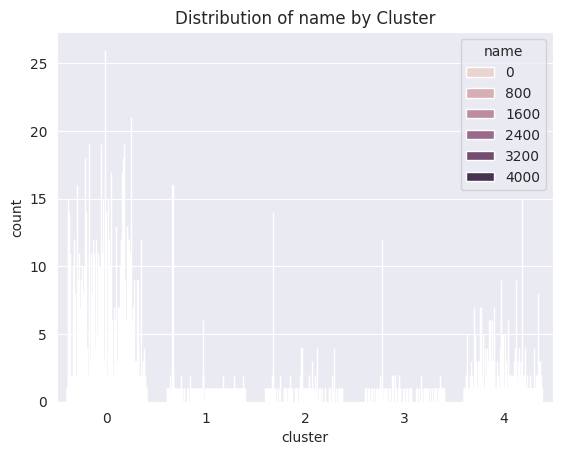

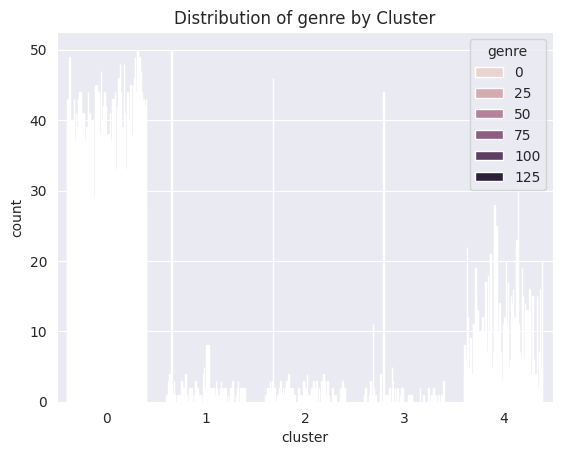

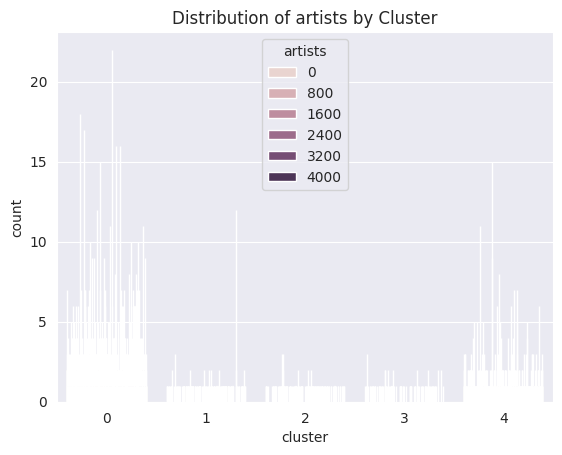

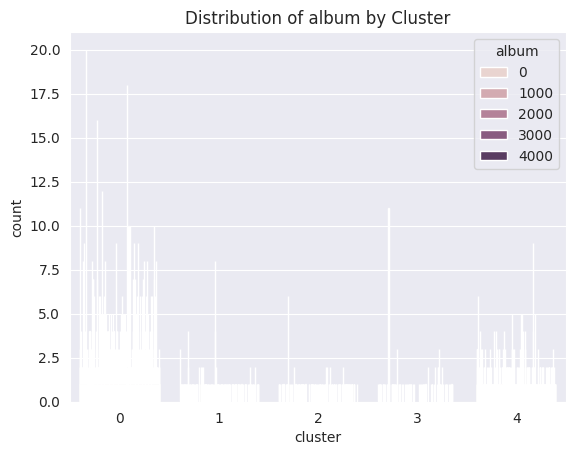

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize frequency distributions of categorical features for each cluster
for feature in df_categorical:
    sns.countplot(x='cluster', hue=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

In [ ]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
cluster_means = df.groupby('cluster')[df_numerical.columns].mean()
print(cluster_means)

                name      genre      artists        album  popularity  \
cluster                                                                 
0        2262.271900  64.358866  2346.131612  2466.450698   30.989843   
1        1960.771144  47.199005  2487.557214  2248.139303   28.517413   
2        1815.706897  48.459770  2275.212644  2462.494253   19.120690   
3        2236.533898  42.135593  2127.728814  2212.923729    8.576271   
4        2207.995375  61.701203  2245.970398  2434.556892   34.436633   

           duration_ms  explicit  
cluster                           
0        206049.856750  0.004232  
1        205926.791045  0.199005  
2        187252.879310  0.218391  
3        205154.228814  0.144068  
4        190534.342276  0.998150  


## Metadata-Based Recommender

This method will use song features such as genre, artists, and album to calculate similarities between songs, helping recommend songs with similar attributes.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
mb_df = pd.read_csv('https://raw.githubusercontent.com/hitikam/main/main/spotify_tracks.csv')
mb_df

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
...,...,...,...,...,...,...,...,...
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False


In [ ]:
mb_df = mb_df.drop(['id'], axis=1)

### Get Recommendations for Old Song

In [ ]:
# Function to get song recommendations based on similarity scores
def get_recommendations(song_name, album_name, df, cosine_sim):
    # Check if the song and album combination exists in the DataFrame
    condition = (df['name'] == song_name) & (df['album'] == album_name)
    if not condition.any():
        return "Song and album combination not found in the database."

    # Get the index of the song that matches the name and album
    idx = df.index[condition].tolist()[0]

    # Get the pairwise similarity scores of all songs with that song
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar songs
    return df.iloc[song_indices]

In [ ]:
# Combine text features into a single string per song
mb_df['all_features'] = mb_df['genre'] + ' ' + mb_df['artists'] + ' ' + mb_df['album']

#### **With popularity, duration, explicit**

In [ ]:
mb_df['explicit'] = mb_df['explicit'].astype(int)

In [ ]:
# Pipeline for numeric features, including 'explicit' now treated as numeric
numeric_features = ['popularity', 'duration_ms', 'explicit']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Combining categorical, numerical, and now converted boolean features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('tfidf', TfidfVectorizer(stop_words='english'), 'all_features')
    ])

In [ ]:
# Apply preprocessor to your DataFrame
X_combined = preprocessor.fit_transform(mb_df)

In [ ]:
cosine_sim_combined = cosine_similarity(X_combined, X_combined)

In [ ]:
# Example usage:
song_name = 'Waiting for the Dawn'
album_name = 'Mysteriousness'

recommendations = get_recommendations(song_name, album_name, mb_df, cosine_sim_combined)
recommendations

,name,genre,artists,album,popularity,duration_ms,explicit,all_features
25,Waiting for the Storm,acoustic,Acoustic Levitation,Something,13,199000,0,acoustic Acoustic Levitation Something
14,Acoustic,acoustic,"Lesfm, Olexy",Acoustic,5,156654,0,"acoustic Lesfm, Olexy Acoustic"
49,Bubbly,acoustic,Acoustic Guitar Collective,Bubbly,14,159389,0,acoustic Acoustic Guitar Collective Bubbly
30,Whatcha Say - Acoustic,acoustic,Jason Derulo,Heartbreaking Pop,0,222520,0,acoustic Jason Derulo Heartbreaking Pop
38,Acoustic,acoustic,David AI,Just Kidding,0,234700,0,acoustic David AI Just Kidding
6,Beautiful Things - Acoustic,acoustic,Benson Boone,Daydream,0,201248,0,acoustic Benson Boone Daydream
32,Acoustic,acoustic,Helios Jazz Club,Magical Love,1,267311,0,acoustic Helios Jazz Club Magical Love
17,Acoustic,acoustic,Mortal Treason,A Call To The Martyrs,3,213693,0,acoustic Mortal Treason A Call To The Martyrs
12,Too Good At Goodbyes - Acoustic,acoustic,Sam Smith,Hear The Pride,0,220095,0,acoustic Sam Smith Hear The Pride
41,Acoustic,acoustic,U Know & The Drill,Acoustic,2,109354,0,acoustic U Know & The Drill Acoustic


#### Without popularity, duration, explicit

In [ ]:
# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['all_features'])

KeyError: 'all_features'

In [ ]:
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Example usage:
song_name = 'Waiting for the Dawn'
album_name = 'Mysteriousness'

recommendations = get_recommendations(song_name, album_name, mb_df, cosine_sim)
recommendations

### Get Recommendations for New Song

In [ ]:
def get_recommendations_new_song(song_metadata, df, vectorizer, tfidf_matrix):
    # Vectorize the new song's metadata
    new_song_vector = vectorizer.transform([song_metadata])

    # Calculate cosine similarity between the new song and all songs in the dataset
    sim_scores = cosine_similarity(new_song_vector, tfidf_matrix)[0]

    # Get the indices of the songs sorted by similarity scores
    song_indices = sim_scores.argsort()[::-1][1:11]  # skips the first one assuming the highest score is the song itself if it's in the dataset

    # Return the top 10 most similar songs
    return df.iloc[song_indices]

In [ ]:
# Example usage
song_metadata = "Ours Taylor Swift Pop Speak Now"  # Example metadata for a new song
recommended_songs = get_recommendations_new_song(song_metadata, mb_df, vectorizer, tfidf_matrix)
recommended_songs

## Rule-Based Recommendations

**Knowledge-Based Systems**

These systems make recommendations based on explicit rules derived from domain knowledge. This can be particularly useful for dealing with specific user queries or preferences that are well-defined.

* **Rule-Based Recommendations**: Create rules that recommend songs based on matching certain criteria. For example, if a listener wants songs from a specific genre that are non-explicit, your system could filter songs based on these attributes.
* **Decision Trees**: Use decision trees to classify songs into different recommendation buckets based on their attributes.

### Association Rule Learning

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
rb_df = pd.read_csv('https://raw.githubusercontent.com/hitikam/main/main/spotify_tracks.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Binning popularity
popularity_bins = [0, 30, 60, 90]
popularity_labels = ['Low', 'Medium', 'High']
rb_df['popularity_bin'] = pd.cut(rb_df['popularity'], bins=popularity_bins, labels=popularity_labels, include_lowest=True)

# Binning duration
duration_bins = [0, 180000, 300000, float('inf')]
duration_labels = ['Short', 'Average', 'Long']
rb_df['duration_bin'] = pd.cut(rb_df['duration_ms'], bins=duration_bins, labels=duration_labels, include_lowest=True)

rb_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,genre,artists,album,popularity,duration_ms,explicit,popularity_bin,duration_bin
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False,Medium,Short
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False,Medium,Short
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False,Medium,Short
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False,Medium,Short
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False,Medium,Short
...,...,...,...,...,...,...,...,...,...,...
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False,Low,Average
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False,Low,Average
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False,Low,Short
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False,Low,Short


In [ ]:
# Convert 'explicit' from boolean to a more descriptive string
# rb_df['explicit_label'] = rb_df['explicit'].apply(lambda x: 'Explicit' if x else 'Inexplicit')

rb_df = rb_df.drop(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'album'], axis=1)

# Combining 'album', 'artists', and 'genre' for a richer context in transactions
# rb_df['combined_features'] = rb_df.apply(lambda row: f"{row['artists']} {row['genre']} {row['album']} {row['explicit_label']}", axis=1)

rb_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,genre,artists,popularity_bin,duration_bin
0,acoustic,Billy Raffoul,Medium,Short
1,acoustic,Billy Raffoul,Medium,Short
2,acoustic,"Molly Hocking, Bailey Rushlow",Medium,Short
3,acoustic,The Goo Goo Dolls,Medium,Short
4,acoustic,"Guus Dielissen, Casper Esmann",Medium,Short
...,...,...,...,...
6295,world-music,Future World Music,Low,Average
6296,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Low,Average
6297,world-music,Joseph Tawadros,Low,Short
6298,world-music,Future World Music,Low,Short


In [ ]:
# Encode categorical variables
encoded_df = pd.get_dummies(rb_df)       # perform one-hot encoding on the categorical variables
encoded_df = encoded_df.astype(bool)              # convert to boolean type (for optimal performance)
encoded_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_alternative,genre_ambient,genre_anime,genre_black-metal,genre_bluegrass,genre_blues,genre_bossanova,...,artists_闻人听書_,artists_陶晶瑩,artists_黃小琥,artists_서이브,popularity_bin_Low,popularity_bin_Medium,popularity_bin_High,duration_bin_Short,duration_bin_Average,duration_bin_Long
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
6296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
6297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
6298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


#### **Low Support & Threshold**

In [ ]:
# Apply the Apriori algorithm
from mlxtend.frequent_patterns import apriori as apr
from mlxtend.frequent_patterns import association_rules as ar

# identifies frequent itemsets that appear in at least 10% of the transactions
low_frequent_itemsets = apr(encoded_df, min_support=0.0075, use_colnames=True)
low_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.007937,(genre_acoustic)
1,0.007937,(genre_afrobeat)
2,0.007937,(genre_alt-rock)
3,0.007937,(genre_alternative)
4,0.007937,(genre_ambient)
...,...,...
141,0.147937,"(duration_bin_Short, popularity_bin_Medium)"
142,0.200000,"(duration_bin_Average, popularity_bin_Medium)"
143,0.033016,"(duration_bin_Long, popularity_bin_Medium)"
144,0.031587,"(popularity_bin_High, duration_bin_Short)"


In [ ]:
# Generate the association rules
low_rules = ar(low_frequent_itemsets, metric="confidence", min_threshold=0.3)
low_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(genre_breakbeat),(popularity_bin_Low),0.007937,0.528730,0.007619,0.960000,1.815671,0.003423,11.781746,0.452833
1,(genre_detroit-techno),(popularity_bin_Low),0.007937,0.528730,0.007778,0.980000,1.853497,0.003582,23.563492,0.464163
2,(genre_grindcore),(popularity_bin_Low),0.007937,0.528730,0.007778,0.980000,1.853497,0.003582,23.563492,0.464163
3,(genre_metal-misc),(popularity_bin_Low),0.007937,0.528730,0.007778,0.980000,1.853497,0.003582,23.563492,0.464163
4,(genre_progressive-house),(popularity_bin_Low),0.007937,0.528730,0.007778,0.980000,1.853497,0.003582,23.563492,0.464163
5,(genre_songwriter),(popularity_bin_Low),0.007937,0.528730,0.007778,0.980000,1.853497,0.003582,23.563492,0.464163
6,(popularity_bin_Low),(duration_bin_Short),0.528730,0.431746,0.252222,0.477034,1.104895,0.023945,1.086598,0.201448
7,(duration_bin_Short),(popularity_bin_Low),0.431746,0.528730,0.252222,0.584191,1.104895,0.023945,1.133381,0.167067
8,(popularity_bin_Low),(duration_bin_Average),0.528730,0.474603,0.222222,0.420294,0.885570,-0.028715,0.906316,-0.215186
9,(duration_bin_Average),(popularity_bin_Low),0.474603,0.528730,0.222222,0.468227,0.885570,-0.028715,0.886224,-0.197394


#### **High Support & Threshold**

In [ ]:
# Apply the Apriori algorithm
from mlxtend.frequent_patterns import apriori as apr
from mlxtend.frequent_patterns import association_rules as ar

# identifies frequent itemsets that appear in at least 10% of the transactions
high_frequent_itemsets = apr(encoded_df, min_support=0.05, use_colnames=True)
high_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.528730,(popularity_bin_Low)
1,0.380952,(popularity_bin_Medium)
2,0.090317,(popularity_bin_High)
3,0.431746,(duration_bin_Short)
4,0.474603,(duration_bin_Average)
5,0.093651,(duration_bin_Long)
6,0.252222,"(popularity_bin_Low, duration_bin_Short)"
7,0.222222,"(popularity_bin_Low, duration_bin_Average)"
8,0.054286,"(popularity_bin_Low, duration_bin_Long)"
9,0.147937,"(duration_bin_Short, popularity_bin_Medium)"


In [ ]:
# Generate the association rules
high_rules = ar(high_frequent_itemsets, metric="confidence", min_threshold=0.5)
high_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(duration_bin_Short),(popularity_bin_Low),0.431746,0.528730,0.252222,0.584191,1.104895,0.023945,1.133381,0.167067
1,(duration_bin_Long),(popularity_bin_Low),0.093651,0.528730,0.054286,0.579661,1.096327,0.004770,1.121166,0.096942
2,(popularity_bin_Medium),(duration_bin_Average),0.380952,0.474603,0.200000,0.525000,1.106187,0.019199,1.106099,0.155067
3,(popularity_bin_High),(duration_bin_Average),0.090317,0.474603,0.052381,0.579965,1.222000,0.009516,1.250840,0.199706


### Rule-Based Recommendations

This approach involves defining specific rules that filter or select songs based on predefined criteria. It's quite effective when users have clear preferences or when you want to enforce certain content policies.

In [ ]:
def recommend_items(user_items, rules, num_recommendations=5):
    """
    Recommend items based on user's current items using predefined association rules.

    :param user_items: set, current items or attributes associated with the user
    :param rules: DataFrame, sorted association rules
    :param num_recommendations: int, number of recommendations to return
    :return: list, recommended items or item sets
    """
    recommendations = []

    # Iterate over the rules
    for _, rule in rules.iterrows():
        # Check if the antecedents are a subset of user's items
        if set(rule['antecedents']).issubset(user_items):
            # Add consequents to recommendations
            recommendations.extend(list(rule['consequents']))

        # If enough recommendations are collected, break the loop
        if len(recommendations) >= num_recommendations:
            break

    return recommendations[:num_recommendations]

# Example usage
user_current_items = {'breakbeat', 'Billy Raffoul'}
recommended_items = recommend_items(user_current_items, low_rules)
print("Recommended items:", recommended_items)

### Decision Trees

Decision trees can be used to categorize or recommend songs based on multiple attributes by learning from data patterns. This method can be particularly powerful if you have more complex decision-making requirements that involve multiple song attributes.